In [ ]:
# Give some samples of my dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


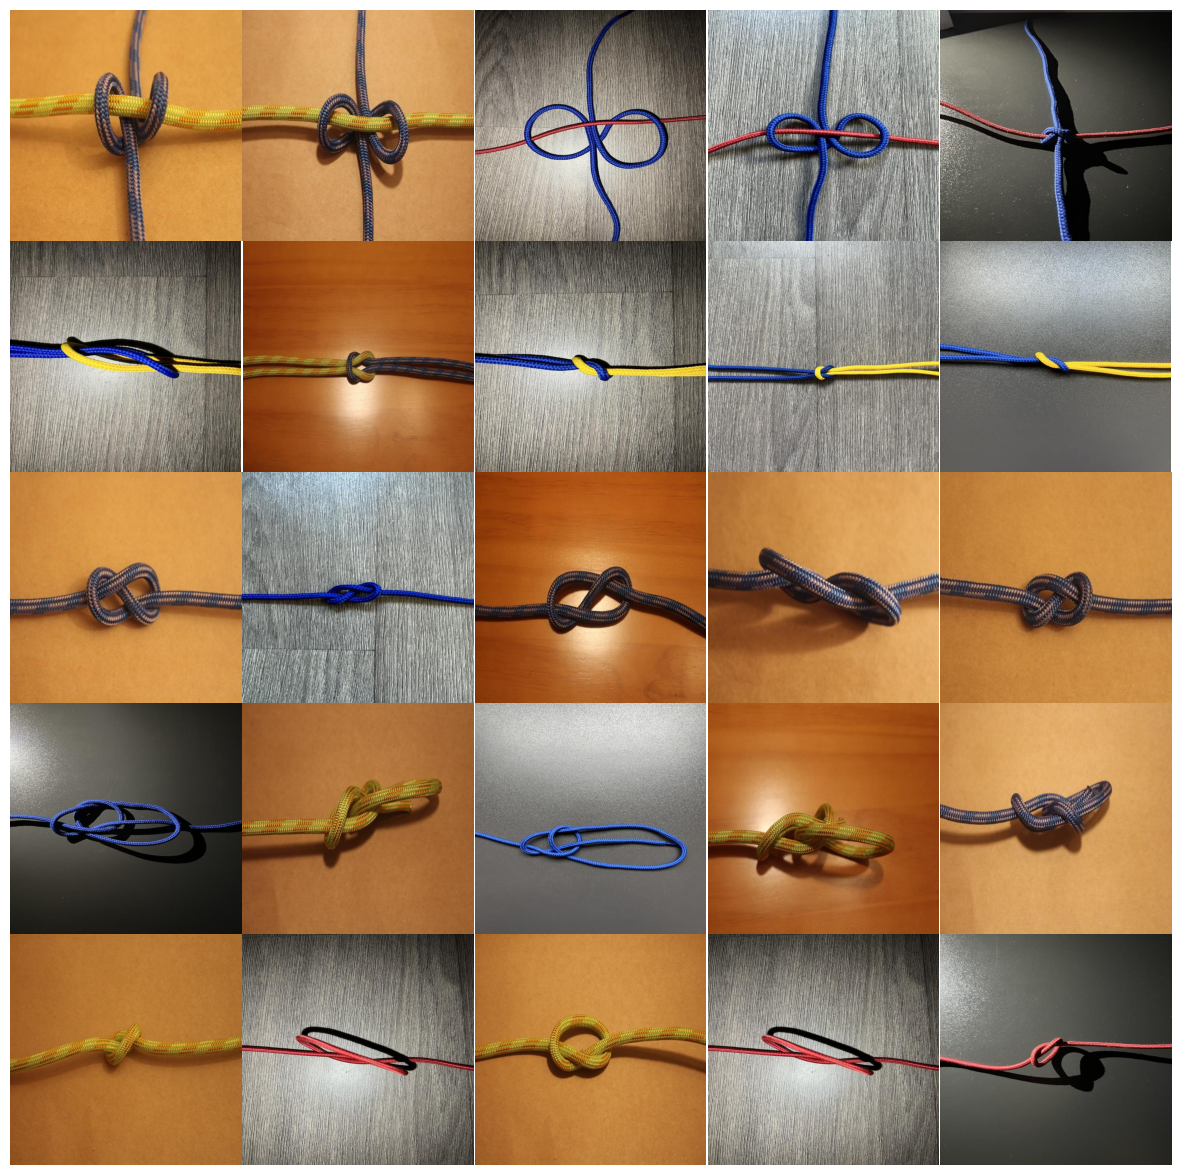

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import random
from google.colab import drive
# Connect to the google conlab
drive.mount('/content/drive')
# Set the dataset path
dataset_path = "/content/drive/My Drive/MSc Project/rawdata"


# 获取所有的绳结类别
knot_types = os.listdir(dataset_path)

# 创建一个5x5的子图
fig, axs = plt.subplots(5, 5, figsize=(15, 15))

# 对于每种绳结类型
for i, knot_type in enumerate(knot_types):
    # 获取该类型的所有光照条件
    light_conditions = os.listdir(os.path.join(dataset_path, knot_type))
    # 对于每种光照条件
    for j in range(5):
        # 随机选择一个光照条件
        light_condition = random.choice(light_conditions)
        # 获取该光照条件下的所有张力条件
        tension_conditions = os.listdir(os.path.join(dataset_path, knot_type, light_condition))
        # 随机选择一个张力条件
        tension_condition = random.choice(tension_conditions)
        # 获取该张力条件下的所有图片
        knot_images = os.listdir(os.path.join(dataset_path, knot_type, light_condition, tension_condition))
        # 随机选择一张图片
        selected_image = random.choice(knot_images)
        # 读取并显示图片
        image = Image.open(os.path.join(dataset_path, knot_type, light_condition, tension_condition, selected_image))
        axs[i, j].imshow(image)
        axs[i, j].axis('off')
        # if j == 2:
        #     axs[i, j].set_title(knot_type)

# 减小子图之间的间距
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchsummary import summary

# 创建ResNet18模型
resnet18 = models.resnet18()

# 输出网络结构摘要
summary(resnet18, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=a3641b47048981695e00b20a1cfb9b846f63a8af6975b896ba5c87530d980002
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
from torchviz import make_dot
import torchvision.models as models
import torch
import torch.nn as nn
from google.colab import drive
drive.mount('/content/drive')
# 加载预训练的ResNet18模型
model = models.resnet18(pretrained=True)

# 创建一个虚拟输入
x = torch.randn(1, 3, 224, 224).requires_grad_(True)

# 运行模型
y = model(x)

# 生成图
dot = make_dot(y, params=dict(list(model.named_parameters()) + [('x', x)]))
# 指定输出路径
output_path = "/content/drive/My Drive/MSc Project/resnet18_structure"

# 渲染图
dot.render(output_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/My Drive/MSc Project/resnet18_structure.pdf'

In [ ]:
from graphviz import Digraph
import torchvision.models as models
import torch
import torch.nn as nn
from google.colab import drive
drive.mount('/content/drive')

def add_block(dot, name, label):
    dot.node(name, label, shape='box')

def add_connection(dot, from_name, to_name):
    dot.edge(from_name, to_name)

dot = Digraph('ResNet18')

# 添加输入
add_block(dot, 'input', 'Input')

# 添加卷积层
add_block(dot, 'conv1', 'Convolution')
add_connection(dot, 'input', 'conv1')

# 添加残差块
for i in range(1, 9):
    add_block(dot, f'res{i}', f'Residual Block {i}')
    add_connection(dot, f'conv{i}' if i == 1 else f'res{i-1}', f'res{i}')

# 添加全连接层
add_block(dot, 'fc', 'Fully Connected')
add_connection(dot, 'res8', 'fc')

# 添加输出
add_block(dot, 'output', 'Output')
add_connection(dot, 'fc', 'output')

# 指定输出路径
output_path = "/content/drive/My Drive/MSc Project/resnet18_structure"

# 渲染图
dot.render(output_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/My Drive/MSc Project/resnet18_structure.pdf'